# PostgreSQL Project Visualization

This section showcases visualizations based on queries I developed in my PostgreSQL notebooks.  
I’ll present charts related to **five key questions** I explored during this project:

**1.  What are the highest-paying Data Analyst roles?**  
**2.  Which skills are most required for the highest-paying Data Analyst roles?**  
**3.  What are the highest in-demand skills for data analysts?**  
**4.  What are the highest-paying skills for Data Analysts?**  
**5.  What are the highest-impact skills to learn as a Data Analyst?**  

For a detailed look at how I executed these queries using Python, check out my full project on GitHub: [My_Python_Data_Analytics_Project](https://github.com/DamtanX/My_Python_Data_Analytics_Project)


In [4]:
#Importing libraries and Loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from adjustText import adjust_text

#USE YOUR OWN PATH
Highest_paying_roles = pd.read_csv('C:\\SQL_staff\\visualization\\Data\\1_Highest_paying_roles.csv')
Highest_earning_skills = pd.read_csv('C:\\SQL_staff\\visualization\\Data\\2_Highest_earning_skills.csv')
Highest_indemand_skills = pd.read_csv('C:\\SQL_staff\\visualization\\Data\\3_Highest_In-demand_skills.csv')
Highest_paying_skills = pd.read_csv('C:\\SQL_staff\\visualization\\Data\\4_Highest_paying_skills.csv')
Highest_impact_skills = pd.read_csv('C:\\SQL_staff\\visualization\\Data\\5_Highest_impact_skills.csv')


## 1. What are the highest-paying Data Analyst roles?

In [164]:
#For better visibility I renamed these two rows
Highest_paying_roles.loc[10, 'title'] = 'Azure Data Python Consultant'
Highest_paying_roles.loc[14, 'title'] = 'Data Analyst 2'
Highest_paying_roles

,title,salary_yearly,company_name,job_posted_date
0,Data Analyst,650000,Mantys,2023-02-20
1,Director of Analytics,336500,Meta,2023-08-23
2,Associate Director- Data Insights,255830,AT&T,2023-06-18
3,"Data Analyst, Marketing",232423,Pinterest Job Advertisements,2023-12-05
4,Data Analyst (Hybrid/Remote),217000,Uclahealthcareers,2023-01-17
5,Principal Data Analyst (Remote),205000,SmartAsset,2023-08-09
6,"Director, Data Analyst - HYBRID",189309,Inclusively,2023-12-07
7,"Principal Data Analyst, AV Performance Analysis",189000,Motional,2023-01-05
8,Principal Data Analyst,186000,SmartAsset,2023-07-11
9,ERM Data Analyst,184000,Get It Recruit - Information Technology,2023-06-09


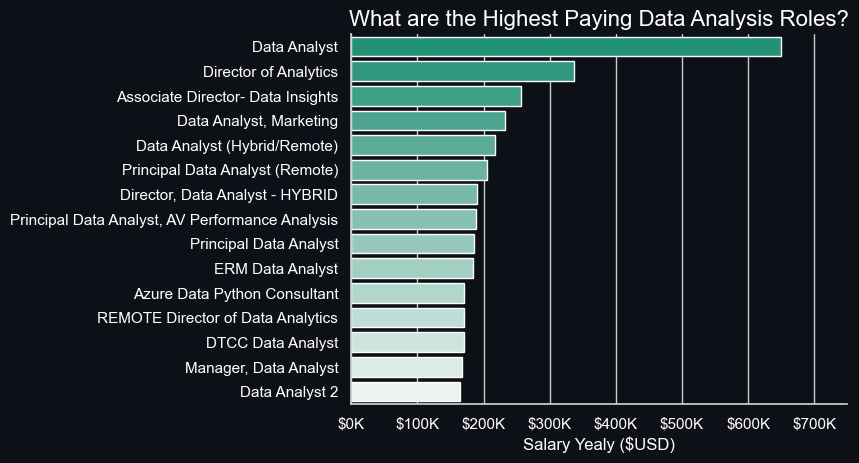

In [ ]:
#Setting a style
plt.figure(facecolor='#0d1117')
sns.set_theme(style='whitegrid')

#Plotting Bar chart
sns.barplot(Highest_paying_roles, x='salary_yearly', y='title', hue='title', palette='light:#10A37F_r').set_facecolor('#0d1117')
sns.despine()

#Configuration
plt.xlabel('Salary Yealy ($USD)', color='white')
plt.ylabel('')

plt.xticks(color='white')
plt.yticks(color='white')

plt.title('What are the Highest Paying Data Analysis Roles?', color='white', fontsize=16)
plt.xlim(0, 750000)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

## 2. Which skills are most required for the highest-paying Data Analyst roles?

In [168]:
Highest_earning_skills.head(15)

,skills,skill_count,salary_yearly,type
0,sql,12,194213,programming
1,python,11,192142,programming
2,tableau,8,202195,analyst_tools
3,r,6,198875,programming
4,excel,5,196766,analyst_tools
5,pandas,4,202957,libraries
6,azure,4,196285,cloud
7,power bi,3,205046,analyst_tools
8,snowflake,3,193436,cloud
9,go,3,187000,programming


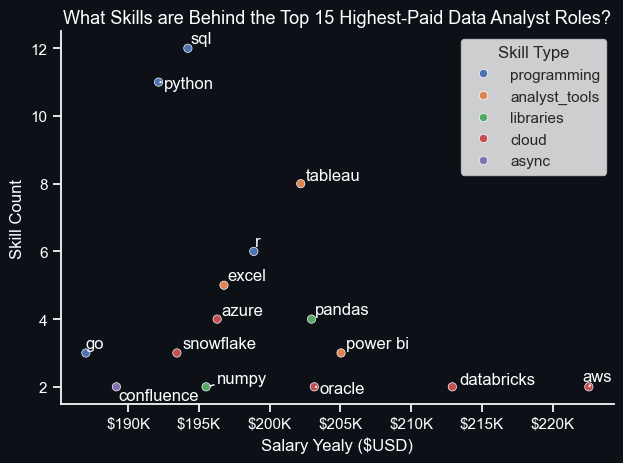

In [ ]:
#Setting a style
plt.figure(facecolor='#0d1117')
sns.set_theme(style='ticks')

#Plotting Scatter chart
sns.scatterplot(Highest_earning_skills.drop_duplicates('salary_yearly').head(15), x='salary_yearly', y='skill_count', hue='type').set_facecolor('#0d1117')
sns.despine()

#Configuration
plt.xlabel('Salary Yealy ($USD)', color='white')
plt.ylabel('Skill Count', color='white')
plt.legend().set_title('Skill Type')
plt.title('What Skills are Behind the Top 15 Highest-Paid Data Analyst Roles?', color='white', fontsize=13)

plt.xticks(color='white')
plt.yticks(color='white')

#Adding Skill names
labels = []
for i, row in Highest_earning_skills.drop_duplicates('salary_yearly').head(15).iterrows():
    labels.append(plt.text(x=row['salary_yearly'], y=row['skill_count'], s=row['skills'], color='white'))

adjust_text(labels, arrowprops=dict(arrowstyle='->', color='white'))

#Designing
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

for spine in ax.spines.values():
    spine.set_color('white')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.tight_layout()
plt.show()

## 3. What are the highest in-demand skills for data analysts?

In [ ]:
#Capitalizing Skill names and Sorting
Highest_indemand_skills['skills'] = Highest_indemand_skills['skills'].str.title()
Highest_indemand_skills = Highest_indemand_skills.sort_values(by='skill_count')
Highest_indemand_skills

,skills,skill_count
9,Powerpoint,819
8,Azure,821
7,Looker,868
6,Sas,1866
5,R,2142
4,Power Bi,2609
3,Tableau,3745
2,Python,4330
1,Excel,4611
0,Sql,7291


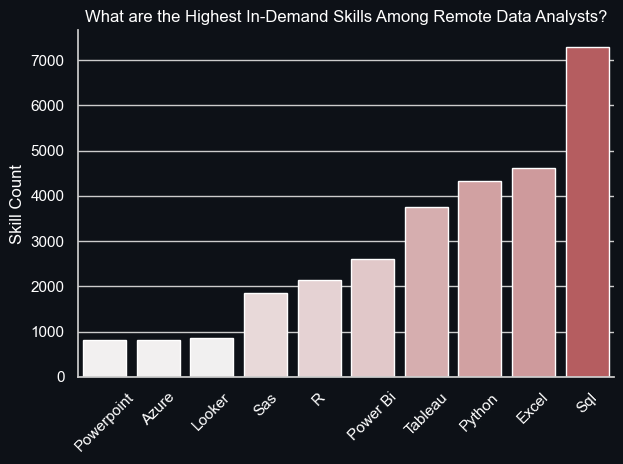

In [ ]:
#Setting a style
plt.figure(facecolor='#0d1117')
sns.set_theme(style='whitegrid')

#Plotting Column graph
sns.barplot(Highest_indemand_skills, x='skills', y='skill_count', hue='skill_count', palette='light:r').set_facecolor('#0d1117')
sns.despine()

#Configuration
plt.xticks(rotation=45) 
plt.xlabel('')
plt.ylabel('Skill Count', color='white')
plt.title('What are the Highest In-Demand Skills Among Remote Data Analysts?', color='white')
plt.legend().set_visible(False)

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()

## 4. What are the highest-paying skills for Data Analysts?

In [5]:
#I left only 15 rows for better visibility and Capitalizing Skill names
Highest_paying_skills = Highest_paying_skills.head(15)
Highest_paying_skills['skills'] = Highest_paying_skills['skills'].str.title()
Highest_paying_skills 

,skills,skill_salary
0,Svn,400000
1,Solidity,179000
2,Couchbase,160515
3,Datarobot,155486
4,Golang,155000
5,Mxnet,149000
6,Dplyr,147633
7,Vmware,147500
8,Terraform,146734
9,Twilio,138500


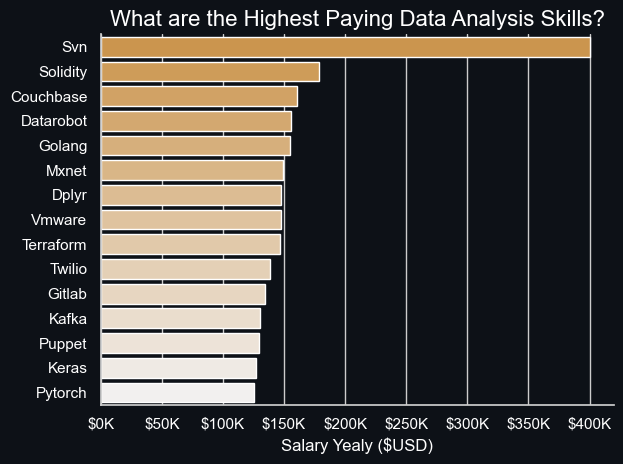

In [ ]:
#Setting a style
plt.figure(facecolor='#0d1117')
sns.set_theme(style='whitegrid')

#Plotting Bar chart
sns.barplot(Highest_paying_skills.head(15), x='skill_salary', y='skills', hue='skills', palette='light:#e09839_r').set_facecolor('#0d1117')
sns.despine()


#Configuration
plt.xlabel('Salary Yealy ($USD)', color='white')
plt.ylabel('')

plt.xticks(color='white')
plt.yticks(color='white')

plt.title('What are the Highest Paying Data Analysis Skills?', color='white', fontsize=16)
plt.xlim(0, 420000)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

## 5. What are the highest-impact skills to learn as a Data Analyst?

In [ ]:
#Cleaning Data
Highest_impact_skills.drop_duplicates('salary_yearly')

,skills,salary_yearly,skill_count,type
0,go,115320,27,programming
1,snowflake,112948,37,cloud
2,azure,111225,34,cloud
3,aws,108317,32,cloud
4,oracle,104534,37,cloud
5,looker,103795,49,analyst_tools
6,python,101397,236,programming
7,r,100499,148,programming
8,tableau,99288,230,analyst_tools
9,sas,98902,63,programming


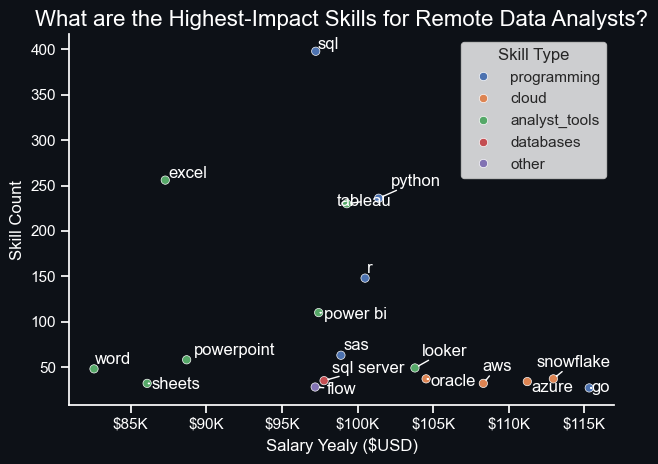

In [ ]:
#Setting a style
plt.figure(facecolor='#0d1117')
sns.set_theme(style='ticks')

#Plotting Scatter chart
sns.scatterplot(Highest_impact_skills.drop_duplicates('salary_yearly'), x='salary_yearly', y='skill_count', hue='type').set_facecolor('#0d1117')
sns.despine()

#Configuration
plt.xlabel('Salary Yealy ($USD)', color='white')
plt.ylabel('Skill Count', color='white')
plt.legend().set_title('Skill Type')
plt.title('What are the Highest-Impact Skills for Remote Data Analysts?', color='white', fontsize=16)

plt.xticks(color='white')
plt.yticks(color='white')


#Adding Skill names
labels = []
for i, row in Highest_impact_skills.drop_duplicates('salary_yearly').iterrows():
    labels.append(plt.text(x=row['salary_yearly'], y=row['skill_count'], s=row['skills'], color='white'))

adjust_text(labels, arrowprops=dict(arrowstyle='->', color='white'))


#Designing
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

for spine in ax.spines.values():
    spine.set_color('white')

ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.tight_layout()
plt.show()

 ## Conclusion

 Using **PostgreSQL**, I answered five key questions about Data Analyst roles and Skills. To enhance the insights and provide a more intuitive understanding of the extracted outcomes, I exported the SQL query results to CSV files and then used **Python** — specifically **Pandas**, **Matplotlib**, and **Seaborn** — to visualize the results and bring the data to life through meaningful illustrations.